<h1>Assignment 3: Machine Learning Fashionista</h1>
<h2>Dimensionality Reduction: PCA vs LDA</h2>

In this assignment, we compare the results of using PCA, LDA, or neither when training a SVC classifier on a dataset of pictures of Jerseys, Shirts, Men’s clothing and Women’s clothing downloaded from ImageNet.

<h3>Instructions:</h3>

1) Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.

2) Build a simple linear classifier using the original pixel data. There are several options that you can try:
- linear SVC (http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc)
- logistic classifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression) 

What is your error rate on the training data? What is your error rate on your testing data?

3) Train the same linear model as in question 1, but now on the reduced representation that you created using PCA. What is your error rate on the training data? What is your error rate on your testing data?

4) Train the same linear model as in question 1, but now on the reduced representation that you created using LDA. What is your error rate on the training data? What is your error rate on your testing data?

5) Write three paragraphs, describing and interpreting your results from questions 1, 2, and 3. Make a recommendation on which classifier you would prefer, and why.

<h2>Cleaning and Processing Data</h2>

<h3>Manual Cleaning of the men and women clothing data</h3>

I manually filtered and sorted the men and women clothing data by removing/cropping:
- pictures with more than one person or one clothing item.
- pictures where more than 50% of the shirt is hidden.
- miscategorized pictures.
- pictures of folded clothing items.


In [107]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
import seaborn as sns
sns.set()

#your path 
men_dir = 'men_clothing/*.JPEG'
women_dir = 'women_clothing/*.JPEG'

#creating a collection with the available images
men = imread_collection(men_dir)
women = imread_collection(women_dir)

print(f"Number of men clothing pictures: {len(men)}.")
print(f"Number of women clothing pictures: {len(women)}.")

Number of men clothing pictures: 698.
Number of women clothing pictures: 944.


<h3>Resizing Images</h3>

In [94]:
#height and width of resized image
new_height = 250
new_width = 200
    
#make sure men and women dataset are similar sized to have a balanced dataset
men_resized = [resize(men[i],(new_height,new_width)) for i in range(len(men))]
women_resized = [resize(women[i],(new_height,new_width)) for i in range(len(men))]

men_arr = np.array([i.flatten() for i in men_resized])
women_arr = np.array([i.flatten() for i in women_resized])

print(men_arr.shape,women_arr.shape)


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(698, 150000) (698, 150000)


Text(0,0.5,'Women Resized')

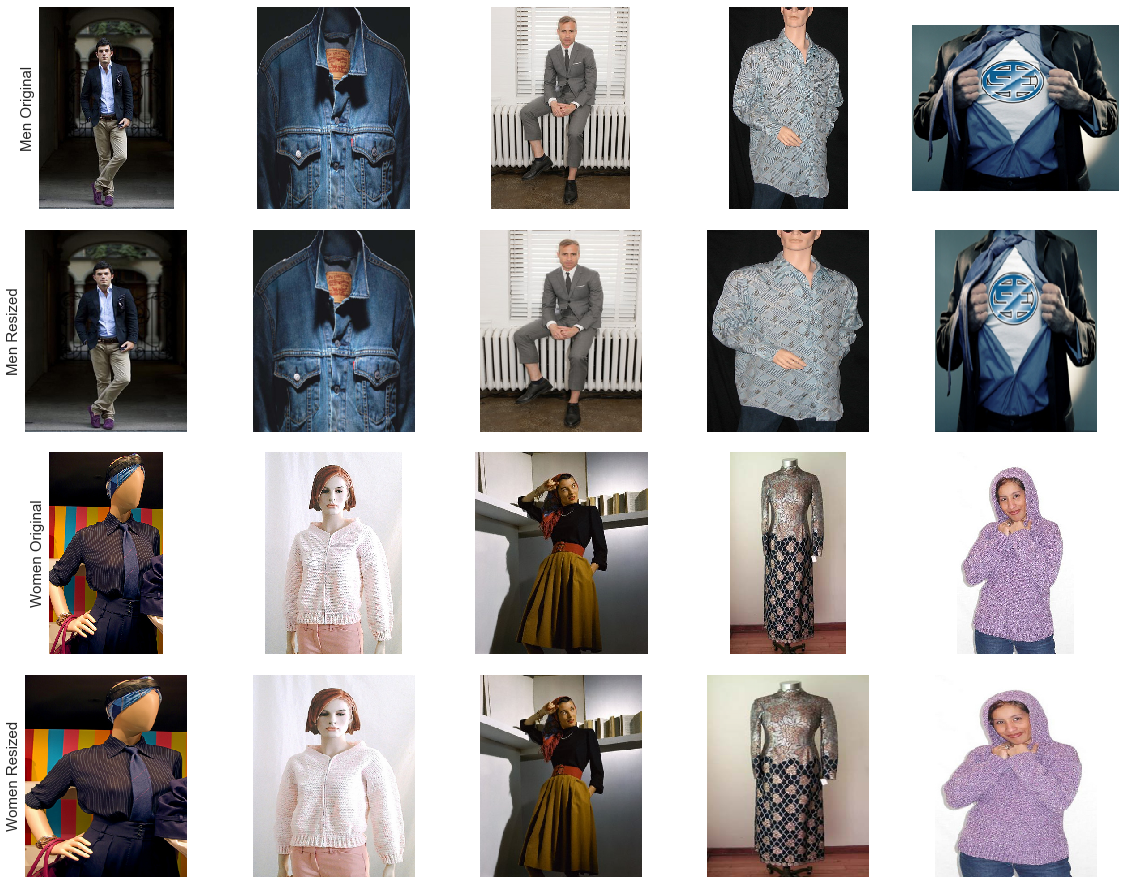

In [143]:
fig, ax = plt.subplots(4, 5, figsize=(20, 16),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(men[i])
    ax[1, i].imshow(men_resized[i])
    ax[2, i].imshow(women[i])
    ax[3, i].imshow(women_resized[i])
    
ax[0, 0].set_ylabel('Men Original',size=15)
ax[1, 0].set_ylabel('Men Resized',size=15)
ax[2, 0].set_ylabel('Women Original',size=15)
ax[3, 0].set_ylabel('Women Resized',size=15)

<h2>Model Training and Evaluation</h2>

In [103]:
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report


In [96]:
#create labels for men and women data. 1 is for men, 0 is for women.
men_label = np.ones(len(men_arr))
women_label = np.zeros(len(women_arr))

#join the men and women clothing data together.
X = np.concatenate((men_arr, women_arr), axis=0)
y = np.concatenate((men_label, women_label), axis=0)

#split the data with 0.2 test size.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1116, 150000) (1116,) (280, 150000) (280,)


In [97]:
import collections

print("Number of 0's (women clothing) and 1's (men clothing) in test and train set:")
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Number of 0's (women clothing) and 1's (men clothing) in test and train set:
Counter({0.0: 558, 1.0: 558})
Counter({0.0: 140, 1.0: 140})


In [189]:
#Cross-validation to find best C-value for logistic regression classifier
logr_mod = LogisticRegressionCV(Cs=10).fit(X_train, y_train)

print(f'Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{logr_mod.C_}\n')
print(f'Mean cross-validation accuracy score: \n{np.mean(logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(y_train, logr_mod.predict(X_train))}')
print(f'Accuracy: {logr_mod.score(X_train,y_train)}')


Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.00077426]

Mean cross-validation accuracy score: 
0.6684587813620073

Classification report:
             precision    recall  f1-score   support

        0.0       0.88      0.91      0.90       558
        1.0       0.91      0.88      0.90       558

avg / total       0.90      0.90      0.90      1116

Accuracy: 0.8969534050179212


In [146]:
#Performance of cv-ed logistic regression model on test set
y_pred = logr_mod.predict(X_test)
print("Logistic Regression Model Performance on Original Pixel Test Set\n")
print(f"Accuracy score: {logr_mod.score(X_test,y_test)}\n")
print(f"Classification report: \n{classification_report(y_test, y_pred)}")


Logistic Regression Model Performance on Original Pixel Test Set

Accuracy score: 0.7035714285714286

Classification report: 
             precision    recall  f1-score   support

        0.0       0.71      0.69      0.70       140
        1.0       0.70      0.72      0.71       140

avg / total       0.70      0.70      0.70       280



<h3>PCA Dimensionality Reduction</h3>

In [171]:
#Use randomized svd_solver to approx first N Principle Components much quicker than standard PCA
#useful for high-dimensional data
pca = PCA(n_components = 200, svd_solver='randomized').fit(X_train, y_train)
pca_components_train = pca.transform(X_train)  
print("original shape:   ", X_train.shape)
print("transformed shape:", pca_components.shape)


original shape:    (1116, 150000)
transformed shape: (1116, 200)


Text(0,0.5,'cumulative explained variance')

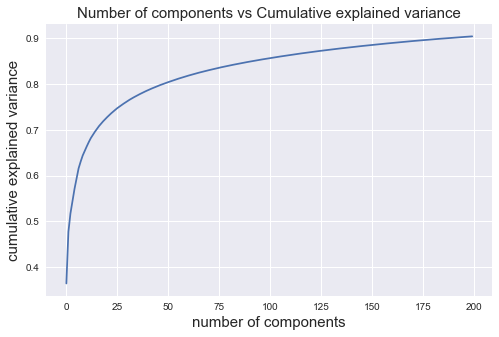

In [152]:
#plot cumulative explained variance across number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Number of components vs Cumulative explained variance',size=15)
plt.xlabel('number of components',size=15)
plt.ylabel('cumulative explained variance',size=15)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0,0.5,'200-dim\nreconstruction')

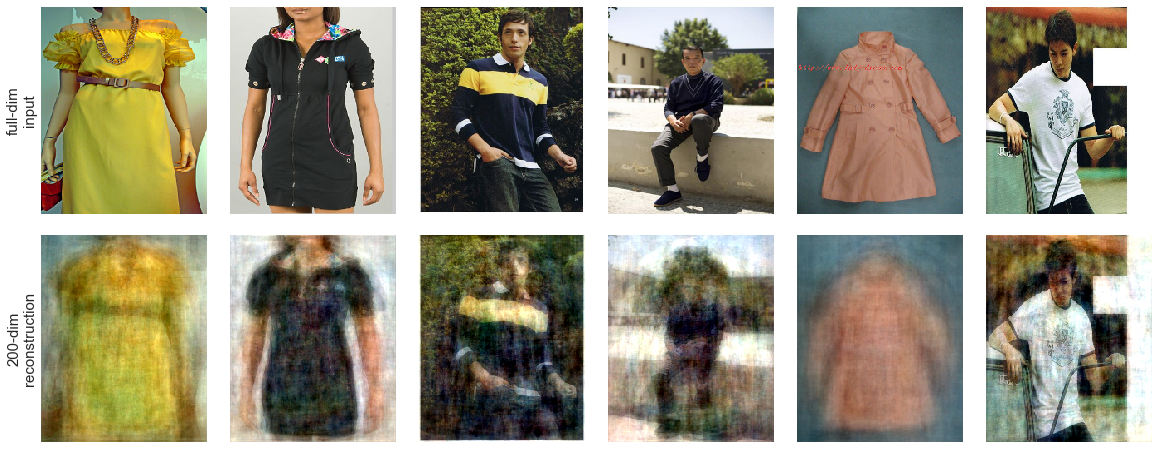

In [172]:
#compare input images with images reconstructed from 200 components
pca_projected = pca.inverse_transform(pca_components_train)

# Plot the results
fig, ax = plt.subplots(2, 6, figsize=(20, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(X_train[i].reshape(new_height,new_width,3))
    ax[1, i].imshow(pca_projected[i].reshape(new_height,new_width,3))
    
ax[0, 0].set_ylabel('full-dim\ninput',size=15)
ax[1, 0].set_ylabel('200-dim\nreconstruction',size=15)


In [188]:
#Cross-validation to find best C-value for logistic regression classifier
pca_logr_mod = LogisticRegressionCV(Cs=10).fit(pca_components_train,y_train)

print(f'Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{pca_logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{pca_logr_mod.C_}\n')
print(f'Mean cross-validation accuracy score: \n{np.mean(pca_logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(y_train, pca_logr_mod.predict(pca_components_train))}')
print(f'Accuracy: {pca_logr_mod.score(pca_components_train,y_train)}')



Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.0001]

Mean cross-validation accuracy score: 
0.6521505376344086

Classification report:
             precision    recall  f1-score   support

        0.0       0.73      0.78      0.75       558
        1.0       0.76      0.71      0.73       558

avg / total       0.74      0.74      0.74      1116

Accuracy: 0.742831541218638


In [177]:
#Performance of cv-ed logistic regression model on test set
pca_components_test = pca.transform(X_test)

pca_y_pred = pca_logr_mod.predict(pca_components_test)

print("Logistic Regression Model Performance on PCA Reduced-Dimensionality (n_components=200) Set\n")
print(f"Accuracy score: {pca_logr_mod.score(pca_components_test,y_test)}\n")
print(f"Classification report: \n{classification_report(y_test, pca_y_pred)}")


Logistic Regression Model Performance on PCA Reduced-Dimensionality (n_components=200) Set

Accuracy score: 0.7214285714285714

Classification report: 
             precision    recall  f1-score   support

        0.0       0.72      0.73      0.72       140
        1.0       0.72      0.71      0.72       140

avg / total       0.72      0.72      0.72       280



<h3>LDA Dimensionality Reduction</h3>

In [178]:
lda = LDA(n_components=1).fit(X_train, y_train)
lda_X_train = lda.transform(X_train) 
print("original shape:   ", X_train.shape)
print("transformed shape:", lda_X_train.shape)
    

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


original shape:    (1116, 150000)
transformed shape: (1116, 1)


In [168]:
#explained variance ratio for lda is 1 since there's only 1 component
print(lda.explained_variance_ratio_)


[1.]


In [187]:
#Cross-validation to find best C-value for logistic regression classifier
lda_logr_mod = LogisticRegressionCV(Cs=10).fit(lda_X_train,y_train)

print(f'Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{lda_logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{lda_logr_mod.C_}\n')
print(f'Mean accuracy score: \n{np.mean(lda_logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(y_train, lda_logr_mod.predict(lda_X_train))}')
print(f'Accuracy: {lda_logr_mod.score(lda_X_train,y_train)}')



Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.35938137]

Mean accuracy score: 
0.9306451612903227

Classification report:
             precision    recall  f1-score   support

        0.0       0.92      0.94      0.93       558
        1.0       0.94      0.92      0.93       558

avg / total       0.93      0.93      0.93      1116

Accuracy: 0.9310035842293907


In [180]:
#Performance of cv-ed logistic regression model on test set
lda_X_test = lda.transform(X_test)

lda_y_pred = lda_logr_mod.predict(lda_X_test)

print("Logistic Regression Model Performance on LDA Reduced-Dimensionality (n_components=1) Set\n")
print(f"Accuracy score: {lda_logr_mod.score(lda_X_test,y_test)}\n")
print(f"Classification report: \n{classification_report(y_test, lda_y_pred)}")


Logistic Regression Model Performance on LDA Reduced-Dimensionality (n_components=200) Set

Accuracy score: 0.6321428571428571

Classification report: 
             precision    recall  f1-score   support

        0.0       0.64      0.61      0.63       140
        1.0       0.63      0.65      0.64       140

avg / total       0.63      0.63      0.63       280



<h2>Summary</h2>
<h3>Interpretation of Results</h3>
<h3>Recommendation</h3>

Questions for Sterne:

- should we use the highest explained variance for pca, or just use n_components = 1? Which would be more equivalent to the lda n_component = 1 (since the explained ratio is obvs 1 for this)?

- right now, 200 components for PCA, training results is worse than LDA (65 accuracy, 74 precision n recall), but test results are better (72 precision, accuracy, recall). LDA has better training results (93% accuracy, precision, recall) but worse test results (0.63 accuracy, precision, recall).